# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\Ivy\Downloads/'



In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = r"C:\Users\Ivy\Downloads\Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == "YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'C:\\Users\\Ivy\\Downloads\\Crimes_-_2001_to_Present.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [5]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746331,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7746332,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7746333,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7746334,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [6]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [7]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,G000412,01/01/2001 01:00:00 AM,032XX N SHEFFIELD AV,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,NaN,06,"1,169,005.00","1,921,458.00",2001,08/17/2015 03:03:40 PM,41.94,-87.65,"(41.940000996, -87.654258339)"
2001-01-01 01:00:00,1310858,G001441,01/01/2001 01:00:00 PM,032XX W BELLE PLAINE AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,NaN,26,"1,154,092.00","1,927,036.00",2001,08/17/2015 03:03:40 PM,41.96,-87.71,"(41.955618511, -87.708919081)"
2001-01-01 01:00:00,1311933,G002620,01/01/2001 01:00:00 AM,016XX N LEAVITT ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,NaN,17,"1,161,480.00","1,910,757.00",2001,08/17/2015 03:03:40 PM,41.91,-87.68,"(41.910796986, -87.682213687)"
2001-01-01 01:00:00,1315701,G003835,01/01/2001 01:00:00 PM,011XX S PULASKI RD,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,NaN,04B,"1,149,936.00","1,894,501.00",2001,08/17/2015 03:03:40 PM,41.87,-87.73,"(41.866421432, -87.72504577)"
2001-01-01 01:00:00,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,NaN,14,"1,116,671.00","1,933,824.00",2001,08/17/2015 03:03:40 PM,41.97,-87.85,"(41.974911416, -87.846347904)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25 12:54:00,12993971,JG166074,02/25/2023 12:54:00 AM,047XX N MAPLEWOOD AVE,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,False,1911,19.00,40.00,4.00,04A,"1,158,515.00","1,931,402.00",2023,03/04/2023 03:51:15 PM,41.97,-87.69,"(41.96750947, -87.692539119)"
2023-02-25 12:54:00,12993475,JG165476,02/25/2023 12:54:00 PM,036XX W ARMITAGE AVE,1811,NARCOTICS,POSSESS - CANNABIS 30 GRAMS OR LESS,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,2535,25.00,26.00,22.00,18,"1,151,631.00","1,913,041.00",2023,03/04/2023 03:51:15 PM,41.92,-87.72,"(41.917263956, -87.718335376)"
2023-02-25 12:56:00,12993057,JG164983,02/25/2023 12:56:00 AM,022XX S PRINCETON AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,914,9.00,25.00,34.00,15,"1,174,572.00","1,889,143.00",2023,03/04/2023 03:51:15 PM,41.85,-87.63,"(41.851204063, -87.634765052)"


In [8]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486801
2001    485872
2003    475979
2004    469420
2005    453769
2006    448174
2007    437081
2008    427159
2009    392816
2010    370492
2011    351959
2012    336260
2013    307462
2014    275724
2016    269778
2017    269045
2018    268747
2015    264736
2019    261214
2022    237161
2020    212040
2021    208435
2023     36212
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,2001,41.94,-87.65
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,2001,41.96,-87.71
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,2001,41.91,-87.68
2001-01-01 01:00:00,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,2001,41.87,-87.73
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,2001,41.97,-87.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25 12:54:00,12993971,02/25/2023 12:54:00 AM,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,False,1911,19.00,40.00,2023,41.97,-87.69
2023-02-25 12:54:00,12993475,02/25/2023 12:54:00 PM,NARCOTICS,POSSESS - CANNABIS 30 GRAMS OR LESS,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,2535,25.00,26.00,2023,41.92,-87.72
2023-02-25 12:56:00,12993057,02/25/2023 12:56:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,914,9.00,25.00,2023,41.85,-87.63


In [12]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7746336 entries, 2001-01-01 01:00:00 to 2023-02-25 12:59:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 724.0+ MB


In [13]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   61,970,688.00
ID                      61,970,688.00
Date                   611,960,544.00
Primary Type           519,244,698.00
Description            566,936,123.00
Location Description   527,966,481.00
Arrest                   7,746,336.00
Domestic                 7,746,336.00
Beat                    61,970,688.00
District                61,970,688.00
Ward                    61,970,688.00
Year                   472,526,496.00
Latitude                61,970,688.00
Longitude               61,970,688.00
dtype: float64

In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [15]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [16]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [17]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [18]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [19]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65
1,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.00,NaN,41.96,-87.71
2,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,41.91,-87.68
3,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.00,NaN,41.87,-87.73
4,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
...,...,...,...,...,...,...,...,...,...,...,...,...
36207,12993971,02/25/2023 12:54:00 AM,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,False,1911,19.00,40.00,41.97,-87.69
36208,12993475,02/25/2023 12:54:00 PM,NARCOTICS,POSSESS - CANNABIS 30 GRAMS OR LESS,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,2535,25.00,26.00,41.92,-87.72
36209,12993057,02/25/2023 12:56:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,914,9.00,25.00,41.85,-87.63
36210,12993084,02/25/2023 12:58:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,221,2.00,4.00,41.81,-87.60


In [20]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485872
2002    486801
2003    475979
2004    469420
2005    453769
2006    448174
2007    437081
2008    427159
2009    392816
2010    370492
2011    351959
2012    336260
2013    307462
2014    275724
2015    264736
2016    269778
2017    269045
2018    268747
2019    261214
2020    212040
2021    208435
2022    237161
2023     36212
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

# Project 4 - Part 1

- 1) Comparing Police Districts:
    - Which district has the most crimes? Which has the least?

In [21]:
#import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


In [22]:
df2 =df.copy()

In [23]:
df2 = df2.drop(columns=['ID','Description','Location Description','Latitude','Longitude'])

In [24]:
df2['District'].value_counts()

8.00     520777
11.00    497535
6.00     452786
7.00     448697
25.00    440832
4.00     439815
3.00     392897
12.00    383315
9.00     378755
2.00     366542
19.00    347455
18.00    347381
5.00     343500
10.00    333716
15.00    332483
1.00     312538
14.00    299882
16.00    258982
22.00    253895
24.00    233851
17.00    223558
20.00    136861
31.00       232
21.00         4
Name: District, dtype: int64

District 8 has the most crimes; District 21 has the least crimes.


- 2) Crimes Across the Years
    - Is the total number of crimes increasing or decreasing across the years?
    - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [25]:
years = df2['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485872
2002    486801
2003    475979
2004    469420
2005    453769
2006    448174
2007    437081
2008    427159
2009    392816
2010    370492
2011    351959
2012    336260
2013    307462
2014    275724
2015    264736
2016    269778
2017    269045
2018    268747
2019    261214
2020    212040
2021    208435
2022    237161
2023     36212
Name: Date, dtype: int64

The total number of crimes decreasing over these years.


In [26]:
df2['Primary Type'].value_counts()

THEFT                                1634211
BATTERY                              1416613
CRIMINAL DAMAGE                       882945
NARCOTICS                             746447
ASSAULT                               504047
OTHER OFFENSE                         481183
BURGLARY                              423389
MOTOR VEHICLE THEFT                   371270
DECEPTIVE PRACTICE                    341927
ROBBERY                               291106
CRIMINAL TRESPASS                     213577
WEAPONS VIOLATION                     105159
PROSTITUTION                           69828
OFFENSE INVOLVING CHILDREN             55377
PUBLIC PEACE VIOLATION                 52188
SEX OFFENSE                            30445
CRIM SEXUAL ASSAULT                    27659
INTERFERENCE WITH PUBLIC OFFICER       18285
LIQUOR LAW VIOLATION                   14872
GAMBLING                               14617
ARSON                                  13196
HOMICIDE                               12462
KIDNAPPING

In [63]:
type_count = df2.groupby('Primary Type').size().reset_index(name='Counts')
type_count

,Primary Type,Counts
0,ARSON,13196
1,ASSAULT,504047
2,BATTERY,1416613
3,BURGLARY,423389
4,CONCEALED CARRY LICENSE VIOLATION,1052
5,CRIM SEXUAL ASSAULT,27659
6,CRIMINAL DAMAGE,882945
7,CRIMINAL SEXUAL ASSAULT,6421
8,CRIMINAL TRESPASS,213577
9,DECEPTIVE PRACTICE,341927


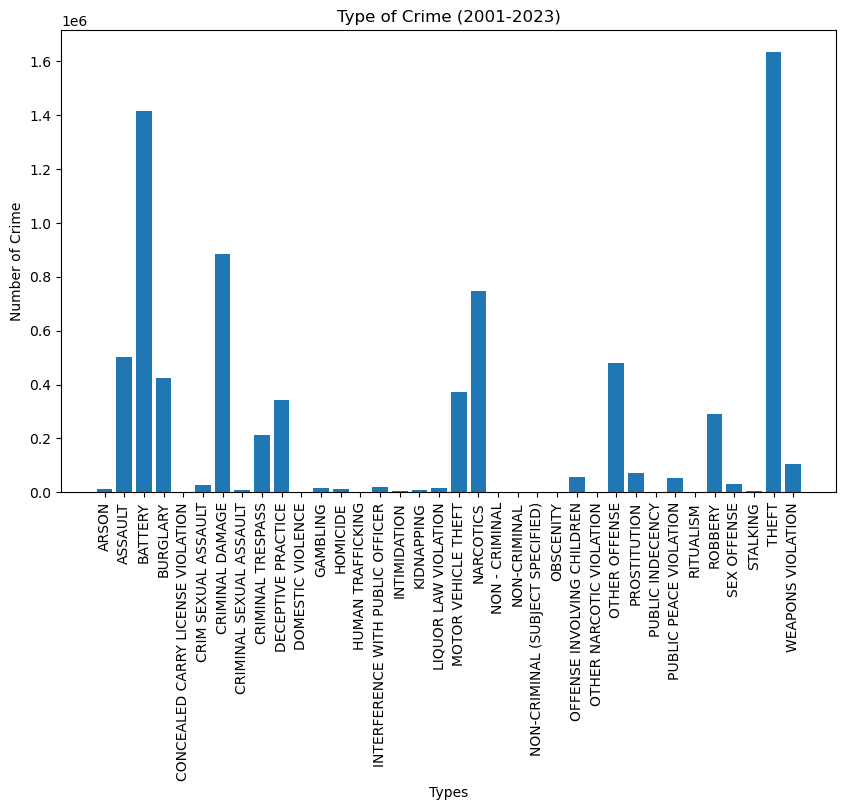

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(type_count['Primary Type'],type_count['Counts'])

# Set the plot title and axis labels
ax.set_title('Type of Crime (2001-2023)')
ax.set_xlabel('Types')
ax.set_ylabel('Number of Crime')
plt.xticks(rotation=90)
plt.show()

- 3. Comparing Months
    - What months have the most crime? What months have the least?
    - Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [27]:
# Creating date and month columns in df
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month_name()

In [39]:
df2['Month'].value_counts()

July         716982
August       710150
May          682730
June         681506
October      676013
September    667939
March        629519
April        626952
January      621517
November     608689
December     579416
February     544923
Name: Month, dtype: int64

July has the most crime among all the months, February have the least.

In [48]:
month_count = df2.groupby('Month').size().reset_index(name='Counts')
month_count

,Month,Counts
0,April,626952
1,August,710150
2,December,579416
3,February,544923
4,January,621517
5,July,716982
6,June,681506
7,March,629519
8,May,682730
9,November,608689


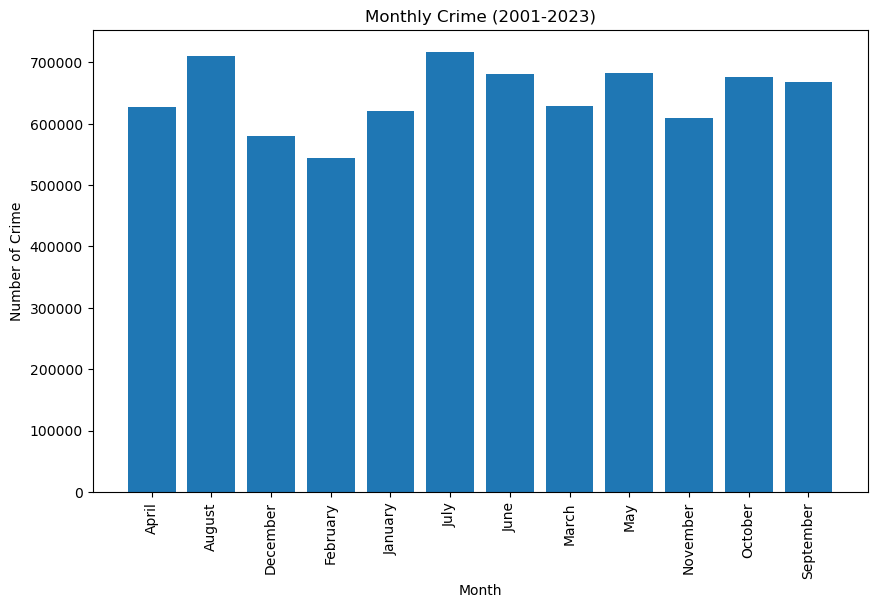

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(month_count['Month'],month_count['Counts'])

# Set the plot title and axis labels
ax.set_title('Monthly Crime (2001-2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Crime')
plt.xticks(rotation=90)
plt.show()